**Team Member**

**Name:** Xi Yu


**ID:** 22015116



**Name:** Chenxin Li


**ID:** 22066519

**The code executes to the end without an error.**

References: <br>
https://github.com/ageron/handson-ml2/blob/master/18_reinforcement_learning.ipynb <br>

# Import and setup

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)


!apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
%pip install -U tf-agents pyvirtualdisplay
%pip install -U gym[box2d,atari,accept-rom-license]

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
24 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
R

import gym and registry

In [ ]:
import gym
from tqdm import tqdm_notebook

In [ ]:
gym.envs.registry.keys()

dict_keys(['ALE/Adventure-v5', 'ALE/Adventure-ram-v5', 'ALE/AirRaid-v5', 'ALE/AirRaid-ram-v5', 'ALE/Alien-v5', 'ALE/Alien-ram-v5', 'ALE/Amidar-v5', 'ALE/Amidar-ram-v5', 'ALE/Assault-v5', 'ALE/Assault-ram-v5', 'ALE/Asterix-v5', 'ALE/Asterix-ram-v5', 'ALE/Asteroids-v5', 'ALE/Asteroids-ram-v5', 'ALE/Atlantis-v5', 'ALE/Atlantis-ram-v5', 'ALE/Atlantis2-v5', 'ALE/Atlantis2-ram-v5', 'ALE/Backgammon-v5', 'ALE/Backgammon-ram-v5', 'ALE/BankHeist-v5', 'ALE/BankHeist-ram-v5', 'ALE/BasicMath-v5', 'ALE/BasicMath-ram-v5', 'ALE/BattleZone-v5', 'ALE/BattleZone-ram-v5', 'ALE/BeamRider-v5', 'ALE/BeamRider-ram-v5', 'ALE/Berzerk-v5', 'ALE/Berzerk-ram-v5', 'ALE/Blackjack-v5', 'ALE/Blackjack-ram-v5', 'ALE/Bowling-v5', 'ALE/Bowling-ram-v5', 'ALE/Boxing-v5', 'ALE/Boxing-ram-v5', 'ALE/Breakout-v5', 'ALE/Breakout-ram-v5', 'ALE/Carnival-v5', 'ALE/Carnival-ram-v5', 'ALE/Casino-v5', 'ALE/Casino-ram-v5', 'ALE/Centipede-v5', 'ALE/Centipede-ram-v5', 'ALE/ChopperCommand-v5', 'ALE/ChopperCommand-ram-v5', 'ALE/CrazyClimb

In [ ]:
game_name = "BreakoutDeterministic-v4"
#game_name = "BreakoutDeterministic-v4"

env = gym.make(game_name, full_action_space = False, render_mode = 'rgb_array')

#height, width, channels = env.observation_space.shape
actions_num = env.action_space.n

Let's initialize the environment by calling is `reset()` method. This returns an observation:

In [ ]:
env.action_space.seed(42)
obs = env.reset()[0]

Observations vary depending on the environment. In this case it is a 1D NumPy array composed of 4 floats: they represent the cart's horizontal position, its velocity, the angle of the pole (0 = vertical), and the angular velocity.

In [ ]:
obs

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

import pyvirtualdisplay to make display. Otherwise, this notebook may not work.

In [ ]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [ ]:
env.render()

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

set `mode="rgb_array"` to get an image of the environment as a NumPy array:

In [ ]:
img = env.render()
img.shape

(210, 160, 3)

In [ ]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img

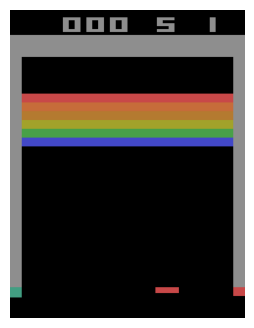

In [ ]:
plot_environment(env)
plt.show()

Now how can we make the pole remain upright? We will need to define a _policy_ for that. This is the strategy that the agent will use to select an action at each step. It can use all the past actions and observations to decide what to do.

Looks like it learned the policy correctly. Now let's see if it can learn a better policy on its own. One that does not wobble as much.

In [ ]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim
def render_policy_net(model, n_max_steps=200, seed=42):
    frames = []
    env = gym.make(game_name, full_action_space = False, render_mode = 'rgb_array')
    env.action_space.seed(seed)
    np.random.seed(seed)
    obs = env.reset()[0]
    for step in range(n_max_steps):
        frames.append(env.render())
        left_proba = model.predict(obs[np.newaxis])
        action = int(np.random.rand() > left_proba)
        obs, reward, terminated, truncated, info = env.step(action)
        if terminated or truncated:
            break
    env.close()
    return frames

In [ ]:
frames = []
score = 0

obs = env.reset()[0]
for step in range(400):
    img = env.render()
    frames.append(img)
    action = env.action_space.sample()

    obs, reward, terminated, truncated, info = env.step(action)
    score += reward
    if terminated or truncated:
        break
print(score)
plot_animation(frames)

1.0


# Deep Q-Network

Preprocess data

In [ ]:
import numpy as np
import cv2

#def preprocess_frame(screen, exclude, output):
def preprocess_frame(screen, output):
    """Preprocess Image.
        
        Params
        ======
            screen (array): RGB Image
            exclude (tuple): Section to be croped (UP, RIGHT, DOWN, LEFT)
            output (int): Size of output image
        """
    # TConver image to gray scale
    screen = cv2.cvtColor(screen, cv2.COLOR_RGB2GRAY)
    
    #Crop screen[Up: Down, Left: right] 
    #screen = screen[exclude[0]:exclude[2], exclude[3]:exclude[1]]
    
    # Convert to float, and normalized
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    
    # Resize image to 84 * 84
    screen = cv2.resize(screen, (output,output), interpolation = cv2.INTER_AREA)
    #print(screen.shape)
    return screen

def stack_frame(stacked_frames, frame):
    stacked_frames[0] = stacked_frames[1]
    stacked_frames[1] = stacked_frames[2]
    stacked_frames[2] = stacked_frames[3]
    stacked_frames[3] = frame
    
    return stacked_frames

In [ ]:
def epsilon_greedy_policy(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        Q_values = model.predict(state[np.newaxis], verbose=0)
        return np.argmax(Q_values[0])

Replay memory

In [ ]:
from collections import deque

replay_memory = deque(maxlen=500)
#replay_memory = deque(maxlen=2000) # reduce it to avoid memeory leak issue

Sample experiences from the replay memory. It will return 5 NumPy arrays: `[obs, actions, rewards, next_obs, dones]`.

In [ ]:
def sample_experiences(batch_size):
    indices = np.random.randint(len(replay_memory), size=batch_size)
    batch = [replay_memory[index] for index in indices]
    states, actions, rewards, next_states, terminated, truncated = [
        np.array([experience[field_index] for experience in batch])
        for field_index in range(6)]
    return states, actions, rewards, next_states, terminated, truncated

Use the DQN to play one step, and record its experience in the replay memory:

In [ ]:
def play_one_step(env, state_stack, epsilon):
    action = epsilon_greedy_policy(state_stack, epsilon)
    next_state, reward, terminated, truncated, info = env.step(action)
    next_state = preprocess_frame(next_state, 84)
    next_state_stack = state_stack
    next_state_stack = stack_frame(next_state_stack, next_state)
    replay_memory.append((state_stack, action, reward, next_state_stack, terminated, truncated))
    return next_state_stack, reward, terminated, truncated

sample some experiences from the replay memory and perform a training step:


In [ ]:
batch_size = 32
discount_rate = 0.95
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
loss_fn = keras.losses.mean_squared_error

def training_step(batch_size):
    experiences = sample_experiences(batch_size)
    states, actions, rewards, next_states, terminated, truncated = experiences
    next_Q_values = model.predict(next_states, verbose=0)
    max_next_Q_values = np.max(next_Q_values, axis=1)
    target_Q_values = (rewards +
                       (1 - terminated - truncated) * discount_rate * max_next_Q_values)
    target_Q_values = target_Q_values.reshape(-1, 1)
    mask = tf.one_hot(actions, n_outputs)
    with tf.GradientTape() as tape:
        all_Q_values = model(states)
        Q_values = tf.reduce_sum(all_Q_values * mask, axis=1, keepdims=True)
        loss = tf.reduce_mean(loss_fn(target_Q_values, Q_values))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

Start training model here

In [ ]:
env.action_space.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

scores = [] 
best_score = 0
step_num = 0
epsilon = 1

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

env = gym.make(game_name, full_action_space = False, render_mode = 'rgb_array')
#input_shape = env.observation_space.shape
input_shape = (4,84,84)
#input_shaped = (4,84,84)
#input_shape = (210, 160, 3)

n_outputs = actions_num

model = keras.models.Sequential([
    #keras.layers.Reshape(input_shaped,input_shape = input_shape),
    keras.layers.InputLayer(input_shape = input_shape),
    keras.layers.Conv2D(32, kernel_size=(8, 8), strides=4, activation="relu",padding='same', data_format = 'channels_first'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(n_outputs, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 21, 21)        8224      
                                                                 
 flatten (Flatten)           (None, 14112)             0         
                                                                 
 dense (Dense)               (None, 128)               1806464   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1,815,204
Trainable params: 1,815,204
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_score = -20
for episode in range(100):
    obs = env.reset()[0]
    obs = preprocess_frame(obs, 84)
    obs_stack = np.stack(arrays=[obs, obs, obs, obs])
    epsilon = max(epsilon * 0.97, 0.01)
    score = 0
    for step in range(10000):
        step_num += 1
        #epsilon = max(epsilon * 0.97, 0.01)
        obs, reward, terminated, truncated = play_one_step(env, obs_stack, epsilon)
        score += reward
        if terminated or truncated:
            break
    scores.append(score) # Not shown in the book
    print("Episode: {}, Steps: {}, eps: {:.3f}, Rewards: {}".format(episode, step + 1, epsilon, score), end="\n")
    if score >= best_score: # Not shown
        best_weights = model.get_weights() # Not shown
        best_score = score # Not shown
    if step_num > batch_size:
        training_step(batch_size)
        

Episode: 0, Steps: 213, eps: 0.970, Rewards: 2.0


Episode: 1, Steps: 172, eps: 0.941, Rewards: 1.0
Episode: 2, Steps: 131, eps: 0.913, Rewards: 0.0
Episode: 3, Steps: 130, eps: 0.885, Rewards: 0.0
Episode: 4, Steps: 179, eps: 0.859, Rewards: 1.0
Episode: 5, Steps: 134, eps: 0.833, Rewards: 0.0
Episode: 6, Steps: 131, eps: 0.808, Rewards: 0.0
Episode: 7, Steps: 301, eps: 0.784, Rewards: 3.0
Episode: 8, Steps: 266, eps: 0.760, Rewards: 3.0
Episode: 9, Steps: 137, eps: 0.737, Rewards: 0.0
Episode: 10, Steps: 145, eps: 0.715, Rewards: 0.0
Episode: 11, Steps: 228, eps: 0.694, Rewards: 2.0
Episode: 12, Steps: 223, eps: 0.673, Rewards: 2.0
Episode: 13, Steps: 280, eps: 0.653, Rewards: 3.0
Episode: 14, Steps: 172, eps: 0.633, Rewards: 1.0
Episode: 15, Steps: 156, eps: 0.614, Rewards: 0.0
Episode: 16, Steps: 292, eps: 0.596, Rewards: 4.0
Episode: 17, Steps: 320, eps: 0.578, Rewards: 5.0
Episode: 18, Steps: 225, eps: 0.561, Rewards: 3.0
Episode: 19, Steps: 209, eps: 0.544, Rewards: 2.0
Episode: 20, Steps: 394, eps: 0.527, Rewards: 7.0
Episode: 

Saving figure dqn_rewards_plot


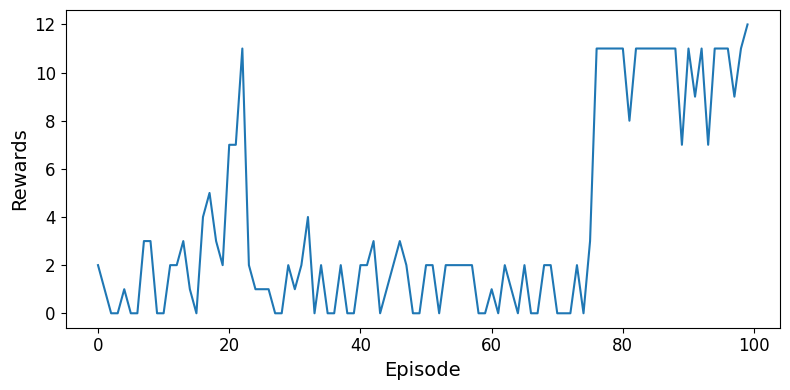

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(scores)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Rewards", fontsize=14)
save_fig("dqn_rewards_plot")
plt.show()

In [ ]:
# to resolve input shape not mapping issue.
def epsilon_greedy_policy_after_learn(state, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(n_outputs)
    else:
        #print(state.shape)
        state_new = state[:,:,0,]
        state_new = cv2.resize(state_new, dsize=(84,84), interpolation = cv2.INTER_AREA)
        state_new=np.stack(arrays=[state_new,state_new,state_new,state_new])
        #state_new=np.transpose(state_new, (1, 2, 0,))
        state_new = state_new[np.newaxis]

        Q_values = model.predict(state_new, verbose=0)
        return np.argmax(Q_values[0])

In [ ]:
env.action_space.seed(42)
state = env.reset()[0]

frames = []

#for step in range(10000):
#while 1:
for step in range(1000):
    action = epsilon_greedy_policy_after_learn(state)
    state, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        break
    img = env.render()
    frames.append(img)
    
plot_animation(frames)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(
